=== Volume per Event Plotting for MUSTANG (ONCE) ===
Landcover: 1
Data folder: /Users/varyabazilova/Desktop/paper2/202406_modelruns/processing_pipeline/test_data_for_claude/volume_per_event_data

Loading: mustang_once_1landcover_60percent_volume_per_event_data.csv
Loading: mustang_once_1landcover_40percent_volume_per_event_data.csv
Loading: mustang_once_1landcover_50percent_volume_per_event_data.csv
Loading: mustang_once_1landcover_30percent_volume_per_event_data.csv
Loading: mustang_once_1landcover_20percent_volume_per_event_data.csv
Total events loaded: 26871
Percentages: ['20percent', '30percent', '40percent', '50percent', '60percent']
Elevation bins: ['5000-5500', '4500-5000', '4000-4500', '3500-4000', '3000-3500', '2500-3000']


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Plot saved to: /Users/varyabazilova/Desktop/paper2/202406_modelruns/processing_pipeline/test_data_for_claude/dfs_vs_dfspot_plots/mustang_once_landcover1_percentage_elevation_scatter.png

=== Data Summary ===
Total events: 26871
Percentages: ['20percent', '30percent', '40percent', '50percent', '60percent']
Elevation bins: ['2500-3000', '3000-3500', '3500-4000', '4000-4500', '4500-5000', '5000-5500']
Date range: 1990-05-08 09:00:00 to 2022-09-16 07:00:00

Events by percentage and elevation bin:
percentage     20percent  30percent  40percent  50percent  60percent
elevation_bin                                                       
2500-3000           1003       1161       1348       1499       1688
3000-3500            112        152        172        212        312
3500-4000           1449       1684       2068       2310       2605
4000-4500            516        597        734        853       1030
4500-5000            296        384        457        560        703
5000-5500          

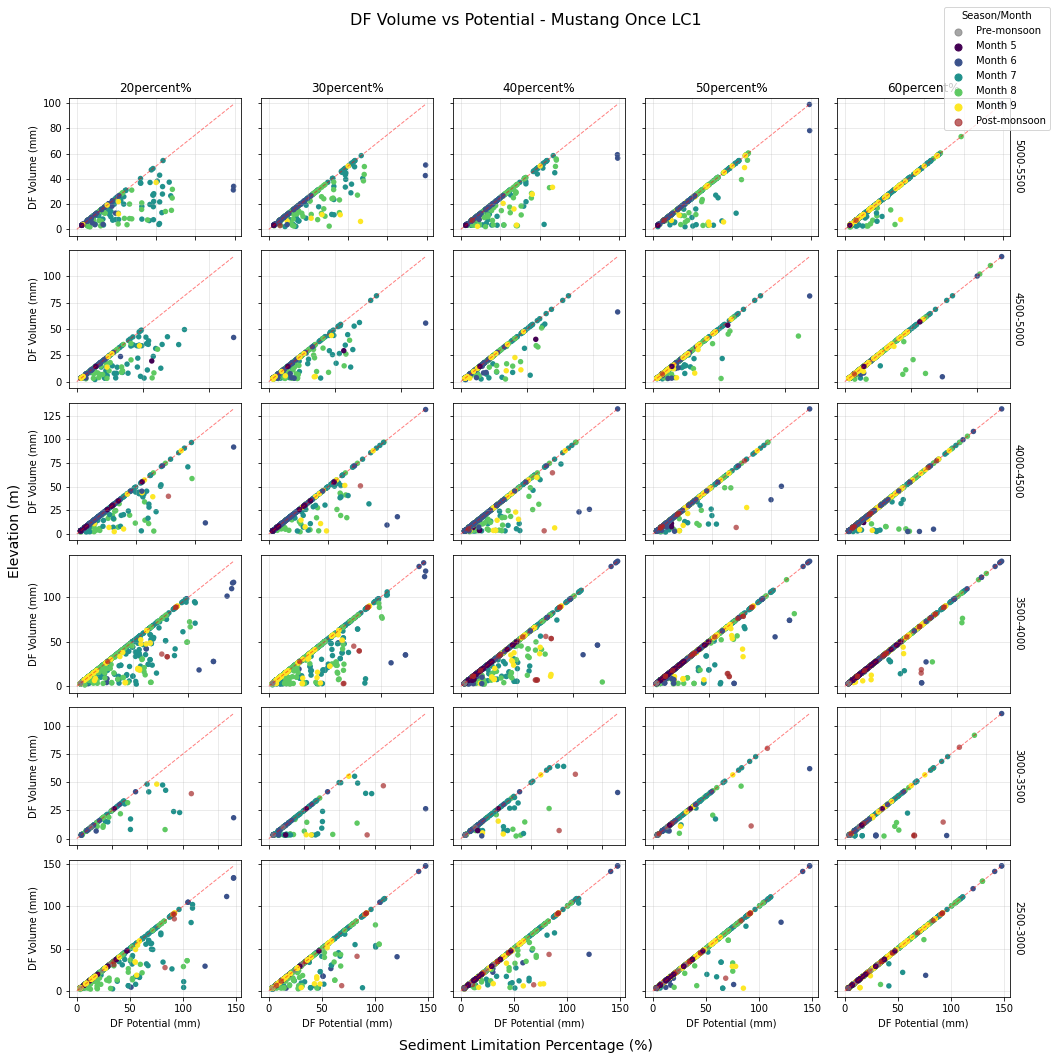

In [80]:
"""
Volume per Event Plotting for Debris Flow Data
Created for SedCas model output visualization

This script creates multi-panel scatter plots showing debris flow volume (dfs) 
vs debris flow potential (dfspot) organized by sediment limitation percentage 
and elevation bin.

Usage:
    python volume_per_event_plotting.py
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
import glob

# =============================================================================
# CONFIGURATION - CHANGE THESE VARIABLES AS NEEDED
# =============================================================================
LOCATION = 'mustang'  # Change to 'mustang' if processing mustang data
METHOD = 'once'       # Change to 'once' for once-yearly sediment input
LANDCOVER = 1          # Land cover to plot (1-5)
DATA_FOLDER = "/Users/varyabazilova/Desktop/paper2/202406_modelruns/processing_pipeline/test_data_for_claude/volume_per_event_data"

def load_landcover_data(landcover):
    """
    Load all percentage data for a specific landcover
    
    Args:
        landcover: Land cover number (1-5)
    
    Returns:
        pd.DataFrame: Combined data for all percentages
    """
    
    data_folder = Path(DATA_FOLDER)
    
    # Find all CSV files for this landcover
    pattern = f"{LOCATION}_{METHOD}_{landcover}landcover_*percent_volume_per_event_data.csv"
    files = list(data_folder.glob(pattern))
    
    if not files:
        print(f"No data files found for landcover {landcover}")
        print(f"Looking for pattern: {pattern}")
        print(f"In folder: {data_folder}")
        return pd.DataFrame()
    
    all_data = []
    
    for file in files:
        print(f"Loading: {file.name}")
        df = pd.read_csv(file)
        all_data.append(df)
    
    # Combine all data
    combined_data = pd.concat(all_data, ignore_index=True)
    print(f"Total events loaded: {len(combined_data)}")
    
    return combined_data

def create_percentage_elevation_plot(data, save_path=None):
    """
    Create scatter plot grid: percentage (x-axis) vs elevation_bin (y-axis)
    
    Args:
        data: DataFrame with debris flow events
        save_path: Optional path to save the plot
    
    Returns:
        matplotlib figure
    """
    
    if len(data) == 0:
        print("No data to plot!")
        return None
    
    # Get unique percentages and elevation bins
    percentages = sorted(data['percentage'].unique())
    
    # Define elevation bin order (highest to lowest for plotting)
    elevation_bin_order = [
        '>=6000', '5500-6000', '5000-5500', '4500-5000',
        '4000-4500', '3500-4000', '3000-3500', '2500-3000', '<2500'
    ]
    
    # Filter to only existing elevation bins in correct order
    available_bins = data['elevation_bin'].unique()
    elevation_bins = [bin_name for bin_name in elevation_bin_order if bin_name in available_bins]
    
    print(f"Percentages: {percentages}")
    print(f"Elevation bins: {elevation_bins}")
    
    # Create figure with subplots
    n_percentages = len(percentages)
    n_elevation_bins = len(elevation_bins)
    
    fig, axes = plt.subplots(n_elevation_bins, n_percentages, 
                            figsize=(n_percentages * 3, n_elevation_bins * 2.5),
                            sharey=False, sharex=False, facecolor='white')
    
    # Handle case of single row or column
    if n_elevation_bins == 1:
        axes = axes.reshape(1, -1)
    if n_percentages == 1:
        axes = axes.reshape(-1, 1)
    if n_elevation_bins == 1 and n_percentages == 1:
        axes = np.array([[axes]])
    
    # Color map for different months by season
    months = sorted(data['month'].unique())
    month_colors = {}
    
    # Define seasonal colors
    for month in months:
        if month in [1, 2, 3, 4, 10, 11, 12]:  # Pre-monsoon and Post-monsoon (Jan-Apr, Oct-Dec)
            if month in [1, 2, 3, 4]:
                month_colors[month] = 'grey'  # Pre-monsoon
            else:
                month_colors[month] = 'brown'  # Post-monsoon
        elif month in [5, 6, 7, 8, 9]:  # Monsoon (May-Sep)
            # Use viridis for monsoon months
            viridis_colors = plt.cm.viridis([0.0, 0.25, 0.5, 0.75, 1.0])
            monsoon_mapping = {5: viridis_colors[0], 6: viridis_colors[1], 7: viridis_colors[2], 
                             8: viridis_colors[3], 9: viridis_colors[4]}
            month_colors[month] = monsoon_mapping[month]
    
    # Create subplot for each percentage/elevation combination
    for i, elevation_bin in enumerate(elevation_bins):
        for j, percentage in enumerate(percentages):
            
            ax = axes[i, j]
            
            # Filter data for this combination
            subset = data[(data['elevation_bin'] == elevation_bin) & 
                         (data['percentage'] == percentage)]
            
            if len(subset) > 0:
                # Create scatter plot with different alphas for seasons
                for month in subset['month'].unique():
                    month_data = subset[subset['month'] == month]
                    
                    # Set alpha based on season
                    if month in [5, 6, 7, 8, 9]:  # Monsoon - full opacity
                        alpha = 1.0
                    else:  # Pre-monsoon and post-monsoon - reduced opacity
                        alpha = 0.7
                    
                    scatter = ax.scatter(
                        x=month_data['dfspot'], 
                        y=month_data['dfs'],
                        c=month_colors[month],
                        s=30,
                        alpha=alpha,
                        edgecolor='none'
                    )
                
                # Add 1:1 line
                max_val = max(subset['dfspot'].max(), subset['dfs'].max())
                if max_val > 0:
                    ax.plot([0, max_val], [0, max_val], 'r--', alpha=0.5, linewidth=1)
                
                # Set axis labels only on edges
                if i == n_elevation_bins - 1:  # Bottom row
                    ax.set_xlabel('DF Potential (mm)')
                if j == 0:  # Left column
                    ax.set_ylabel('DF Volume (mm)')
                
                # Add title for top row (percentage)
                if i == 0:
                    ax.set_title(f'{percentage}%')
                
                # Add elevation bin label on right side
                if j == n_percentages - 1:
                    ax.text(1.02, 0.5, elevation_bin, transform=ax.transAxes,
                           rotation=270, ha='left', va='center')
                
                # Add grid
                ax.grid(True, alpha=0.3)
                
                # Set white background for each subplot
                ax.set_facecolor('white')
                
                # Only show tick labels on leftmost and bottom panels
                if j != 0:  # Not leftmost column
                    ax.set_yticklabels([])
                if i != n_elevation_bins - 1:  # Not bottom row
                    ax.set_xticklabels([])
            
            else:
                # No data for this combination
                ax.text(0.5, 0.5, 'No events', transform=ax.transAxes,
                       ha='center', va='center', fontsize=8)
                ax.set_xlim(0, 1)
                ax.set_ylim(0, 1)
                
                # Set white background for empty panels
                ax.set_facecolor('white')
                
                # Set axis labels only on edges
                if i == n_elevation_bins - 1:
                    ax.set_xlabel('DF Potential (mm)')
                if j == 0:
                    ax.set_ylabel('DF Volume (mm)')
                
                # Add title for top row
                if i == 0:
                    ax.set_title(f'{percentage}%')
                
                # Add elevation bin label on right side
                if j == n_percentages - 1:
                    ax.text(1.02, 0.5, elevation_bin, transform=ax.transAxes,
                           rotation=270, ha='left', va='center')
                
                # Only show tick labels on leftmost and bottom panels
                if j != 0:  # Not leftmost column
                    ax.set_yticklabels([])
                if i != n_elevation_bins - 1:  # Not bottom row
                    ax.set_xticklabels([])
    
    # Add overall title
    fig.suptitle(f'DF Volume vs Potential - {LOCATION.title()} {METHOD.title()} LC{LANDCOVER}', 
                fontsize=16, y=0.98)
    
    # Add overall axis labels
    fig.text(0.5, 0.02, 'Sediment Limitation Percentage (%)', ha='center', fontsize=14)
    fig.text(0.02, 0.5, 'Elevation (m)', va='center', rotation='vertical', fontsize=14)
    
    # Adjust layout
    plt.tight_layout(rect=[0.03, 0.03, 0.97, 0.95])
    
    # Create legend with grouped seasons
    legend_elements = []
    
    # Add pre-monsoon (if exists)
    pre_monsoon_months = [m for m in months if m in [1, 2, 3, 4]]
    if pre_monsoon_months:
        legend_elements.append(plt.scatter([], [], c='grey', s=50, alpha=0.7, label='Pre-monsoon'))
    
    # Add individual monsoon months
    monsoon_months = [m for m in months if m in [5, 6, 7, 8, 9]]
    for month in sorted(monsoon_months):
        legend_elements.append(plt.scatter([], [], c=month_colors[month], s=50, label=f'Month {month}'))
    
    # Add post-monsoon (if exists)
    post_monsoon_months = [m for m in months if m in [10, 11, 12]]
    if post_monsoon_months:
        legend_elements.append(plt.scatter([], [], c='brown', s=50, alpha=0.7, label='Post-monsoon'))
    
    fig.legend(handles=legend_elements, title='Season/Month', loc='upper right', 
              bbox_to_anchor=(0.99, 0.99))
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Plot saved to: {save_path}")
    
    return fig

def main():
    """
    Main execution function
    """
    
    print(f"=== Volume per Event Plotting for {LOCATION.upper()} ({METHOD.upper()}) ===")
    print(f"Landcover: {LANDCOVER}")
    print(f"Data folder: {DATA_FOLDER}\n")
    
    # Load data for specified landcover
    data = load_landcover_data(LANDCOVER)
    
    if len(data) > 0:
        # Create plot
        output_file = f"{LOCATION}_{METHOD}_landcover{LANDCOVER}_percentage_elevation_scatter.png"
        output_path = Path("/Users/varyabazilova/Desktop/paper2/202406_modelruns/processing_pipeline/test_data_for_claude/dfs_vs_dfspot_plots") / output_file
        
        fig = create_percentage_elevation_plot(data, save_path=output_path)
        
        # Display summary statistics
        print(f"\n=== Data Summary ===")
        print(f"Total events: {len(data)}")
        print(f"Percentages: {sorted(data['percentage'].unique())}")
        print(f"Elevation bins: {sorted(data['elevation_bin'].unique())}")
        print(f"Date range: {data['D'].min()} to {data['D'].max()}")
        
        # Show events by percentage and elevation
        summary = data.groupby(['percentage', 'elevation_bin']).size().reset_index(name='event_count')
        print(f"\nEvents by percentage and elevation bin:")
        print(summary.pivot(index='elevation_bin', columns='percentage', values='event_count').fillna(0))
        
        if fig:
            plt.show()
    
    else:
        print("No data found! Check the data folder and file naming pattern.")

if __name__ == "__main__":
    main()

=== Landcover and Method Comparison for MUSTANG ===
Comparing LC1 vs LC5, Daily vs Once
Data folder: /Users/varyabazilova/Desktop/paper2/202406_modelruns/processing_pipeline/test_data_for_claude/volume_per_event_data

Loading data for LC1_daily...
Loading: mustang_daily_1landcover_20percent_volume_per_event_data.csv
Loading: mustang_daily_1landcover_30percent_volume_per_event_data.csv
Loading: mustang_daily_1landcover_50percent_volume_per_event_data.csv
Loading: mustang_daily_1landcover_40percent_volume_per_event_data.csv
Loading: mustang_daily_1landcover_60percent_volume_per_event_data.csv
  Events loaded: 29057
Loading data for LC1_once...
Loading: mustang_once_1landcover_60percent_volume_per_event_data.csv
Loading: mustang_once_1landcover_40percent_volume_per_event_data.csv
Loading: mustang_once_1landcover_50percent_volume_per_event_data.csv
Loading: mustang_once_1landcover_30percent_volume_per_event_data.csv
Loading: mustang_once_1landcover_20percent_volume_per_event_data.csv
  Eve

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Plot saved to: /Users/varyabazilova/Desktop/paper2/202406_modelruns/processing_pipeline/test_data_for_claude/dfs_vs_dfspot_plots/mustang_landcover_method_comparison_scatter.png

=== Data Summary ===
LC1_daily: 29057 events, 5 percentages
LC1_once: 26871 events, 5 percentages
LC5_daily: 25547 events, 5 percentages
LC5_once: 23534 events, 5 percentages


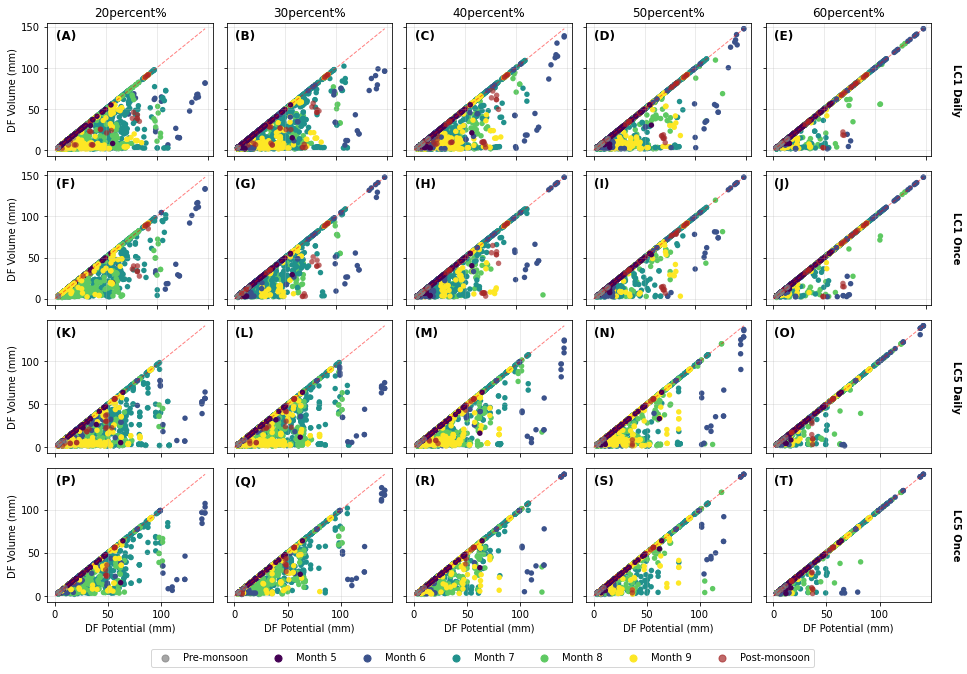

In [98]:
"""
Landcover and Method Comparison Plotting for Debris Flow Data
Created for SedCas model output visualization

This script creates multi-panel scatter plots comparing landcover 1 vs 5 
and daily vs once methods, with sediment limitation percentage on x-axis.

Usage:
    python landcover_method_comparison_plot.py
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
import glob

# =============================================================================
# CONFIGURATION - CHANGE THESE VARIABLES AS NEEDED
# =============================================================================
LOCATION = 'mustang'  # Change to 'mustang' if processing mustang data
LANDCOVERS = [1, 5]    # Land covers to compare
METHODS = ['daily', 'once']  # Methods to compare
DATA_FOLDER = "/Users/varyabazilova/Desktop/paper2/202406_modelruns/processing_pipeline/test_data_for_claude/volume_per_event_data"

def load_landcover_method_data(landcover, method):
    """
    Load all percentage data for a specific landcover and method
    
    Args:
        landcover: Land cover number (1 or 5)
        method: Method ('daily' or 'once')
    
    Returns:
        pd.DataFrame: Combined data for all percentages
    """
    
    data_folder = Path(DATA_FOLDER)
    
    # Find all CSV files for this landcover and method
    pattern = f"{LOCATION}_{method}_{landcover}landcover_*percent_volume_per_event_data.csv"
    files = list(data_folder.glob(pattern))
    
    if not files:
        print(f"No data files found for landcover {landcover}, method {method}")
        print(f"Looking for pattern: {pattern}")
        return pd.DataFrame()
    
    all_data = []
    
    for file in files:
        print(f"Loading: {file.name}")
        df = pd.read_csv(file)
        all_data.append(df)
    
    # Combine all data
    if all_data:
        combined_data = pd.concat(all_data, ignore_index=True)
        print(f"  Events loaded: {len(combined_data)}")
        return combined_data
    else:
        return pd.DataFrame()

def create_landcover_method_comparison_plot(data_dict, save_path=None):
    """
    Create scatter plot grid: percentage (x-axis) vs landcover/method combinations (rows)
    
    Args:
        data_dict: Dictionary with keys like 'LC1_daily', 'LC1_once', etc.
        save_path: Optional path to save the plot
    
    Returns:
        matplotlib figure
    """
    
    # Check if we have data
    total_events = sum(len(df) for df in data_dict.values() if len(df) > 0)
    if total_events == 0:
        print("No data to plot!")
        return None
    
    # Get unique percentages from all data
    all_percentages = set()
    for df in data_dict.values():
        if len(df) > 0:
            all_percentages.update(df['percentage'].unique())
    percentages = sorted(list(all_percentages))
    
    print(f"Percentages found: {percentages}")
    
    # Define row structure: LC1-daily, LC1-once, LC5-daily, LC5-once
    row_configs = [
        ('LC1_daily', 'LC1 Daily'),
        ('LC1_once', 'LC1 Once'), 
        ('LC5_daily', 'LC5 Daily'),
        ('LC5_once', 'LC5 Once')
    ]
    
    # Create figure with subplots
    n_percentages = len(percentages)
    n_rows = len(row_configs)
    
    fig, axes = plt.subplots(n_rows, n_percentages, 
                            figsize=(n_percentages * 3, n_rows * 2.5),
                            sharey=False, sharex=False, facecolor='white')
    
    # Handle case of single row or column
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    if n_percentages == 1:
        axes = axes.reshape(-1, 1)
    if n_rows == 1 and n_percentages == 1:
        axes = np.array([[axes]])
    
    # Define seasonal colors (same as before)
    def get_month_colors(months):
        month_colors = {}
        for month in months:
            if month in [1, 2, 3, 4, 10, 11, 12]:  # Pre-monsoon and Post-monsoon
                if month in [1, 2, 3, 4]:
                    month_colors[month] = 'grey'  # Pre-monsoon
                else:
                    month_colors[month] = 'brown'  # Post-monsoon
            elif month in [5, 6, 7, 8, 9]:  # Monsoon
                viridis_colors = plt.cm.viridis([0.0, 0.25, 0.5, 0.75, 1.0])
                monsoon_mapping = {5: viridis_colors[0], 6: viridis_colors[1], 7: viridis_colors[2], 
                                 8: viridis_colors[3], 9: viridis_colors[4]}
                month_colors[month] = monsoon_mapping[month]
        return month_colors
    
    # Create subplot for each row/percentage combination
    for i, (data_key, row_label) in enumerate(row_configs):
        for j, percentage in enumerate(percentages):
            
            ax = axes[i, j]
            
            # Get data for this combination
            if data_key in data_dict and len(data_dict[data_key]) > 0:
                data = data_dict[data_key]
                
                # Filter data for this percentage (lumping all elevations together)
                subset = data[data['percentage'] == percentage]
                
                if len(subset) > 0:
                    # Get month colors
                    months = subset['month'].unique()
                    month_colors = get_month_colors(months)
                    
                    # Create scatter plot with different alphas for seasons
                    for month in subset['month'].unique():
                        month_data = subset[subset['month'] == month]
                        
                        # Set alpha based on season
                        if month in [5, 6, 7, 8, 9]:  # Monsoon - full opacity
                            alpha = 1.0
                        else:  # Pre-monsoon and post-monsoon - reduced opacity
                            alpha = 0.7
                        
                        scatter = ax.scatter(
                            x=month_data['dfspot'], 
                            y=month_data['dfs'],
                            c=month_colors[month],
                            s=30,
                            alpha=alpha,
                            edgecolor='none'
                        )
                    
                    # Add 1:1 line
                    max_val = max(subset['dfspot'].max(), subset['dfs'].max())
                    if max_val > 0:
                        ax.plot([0, max_val], [0, max_val], 'r--', alpha=0.5, linewidth=1)
                    
                    # Set axis labels only on edges
                    if i == n_rows - 1:  # Bottom row
                        ax.set_xlabel('DF Potential (mm)')
                    if j == 0:  # Left column
                        ax.set_ylabel('DF Volume (mm)')
                    
                    # Add title for top row (percentage)
                    if i == 0:
                        ax.set_title(f'{percentage}%')
                    
                    # Add row label on right side
                    if j == n_percentages - 1:  # Rightmost column
                        ax.text(1.15, 0.5, row_label, transform=ax.transAxes,
                               rotation=270, ha='center', va='center', fontweight='bold')
                    
                    # Add grid
                    ax.grid(True, alpha=0.3)
                    
                    # Set white background for each subplot
                    ax.set_facecolor('white')
                    
                    # Add panel labels (A), (B), (C), etc.
                    panel_label = f"({chr(65 + i * n_percentages + j)})"  # (A), (B), (C), (D), ...
                    ax.text(0.05, 0.95, panel_label, transform=ax.transAxes,
                           fontsize=12, fontweight='bold', va='top', ha='left')
                    
                    # Only show tick labels on leftmost and bottom panels
                    if j != 0:  # Not leftmost column
                        ax.set_yticklabels([])
                    if i != n_rows - 1:  # Not bottom row
                        ax.set_xticklabels([])
                
                else:
                    # No data for this combination
                    ax.text(0.5, 0.5, 'No events', transform=ax.transAxes,
                           ha='center', va='center', fontsize=8)
                    ax.set_xlim(0, 1)
                    ax.set_ylim(0, 1)
                    
                    # Set white background
                    ax.set_facecolor('white')
                    
                    # Add panel labels (A), (B), (C), etc.
                    panel_label = f"({chr(65 + i * n_percentages + j)})"  # (A), (B), (C), (D), ...
                    ax.text(0.05, 0.95, panel_label, transform=ax.transAxes,
                           fontsize=12, fontweight='bold', va='top', ha='left')
                    
                    # Set axis labels and titles
                    if i == n_rows - 1:
                        ax.set_xlabel('DF Potential (mm)')
                    if j == 0:
                        ax.set_ylabel('DF Volume (mm)')
                    if i == 0:
                        ax.set_title(f'{percentage}%')
                    if j == n_percentages - 1:  # Rightmost column
                        ax.text(1.15, 0.5, row_label, transform=ax.transAxes,
                               rotation=270, ha='center', va='center', fontweight='bold')
                    
                    # Hide tick labels
                    if j != 0:
                        ax.set_yticklabels([])
                    if i != n_rows - 1:
                        ax.set_xticklabels([])
            
            else:
                # No data available for this landcover/method combination
                ax.text(0.5, 0.5, 'No data', transform=ax.transAxes,
                       ha='center', va='center', fontsize=8, color='red')
                ax.set_xlim(0, 1)
                ax.set_ylim(0, 1)
                ax.set_facecolor('white')
                
                # Add panel labels (A), (B), (C), etc.
                panel_label = f"({chr(65 + i * n_percentages + j)})"  # (A), (B), (C), (D), ...
                ax.text(0.05, 0.95, panel_label, transform=ax.transAxes,
                       fontsize=12, fontweight='bold', va='top', ha='left')
                
                # Set labels
                if i == n_rows - 1:
                    ax.set_xlabel('DF Potential (mm)')
                if j == 0:
                    ax.set_ylabel('DF Volume (mm)')
                if i == 0:
                    ax.set_title(f'{percentage}%')
                if j == n_percentages - 1:  # Rightmost column
                    ax.text(1.15, 0.5, row_label, transform=ax.transAxes,
                           rotation=270, ha='center', va='center', fontweight='bold')
                
                # Hide tick labels
                if j != 0:
                    ax.set_yticklabels([])
                if i != n_rows - 1:
                    ax.set_xticklabels([])
    
    # # Add overall title
    # fig.suptitle(f'DF Volume vs Potential - {LOCATION.title()} LC1 vs LC5 Comparison', 
    #             fontsize=16, y=0.98)
    
    # Add overall axis labels
    # fig.text(0.5, 0.02, 'Sediment Limitation Percentage (%)', ha='center', fontsize=14)
    # fig.text(0.02, 0.5, 'Landcover / Method', va='center', rotation='vertical', fontsize=14)
    
    # Adjust layout
    plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])
    
    # Create legend with grouped seasons
    legend_elements = []
    
    # Add seasonal legend
    legend_elements.append(plt.scatter([], [], c='grey', s=50, alpha=0.7, label='Pre-monsoon'))
    
    # Add individual monsoon months (5-9)
    viridis_colors = plt.cm.viridis([0.0, 0.25, 0.5, 0.75, 1.0])
    monsoon_mapping = {5: viridis_colors[0], 6: viridis_colors[1], 7: viridis_colors[2], 
                     8: viridis_colors[3], 9: viridis_colors[4]}
    for month in [5, 6, 7, 8, 9]:
        legend_elements.append(plt.scatter([], [], c=monsoon_mapping[month], s=50, label=f'Month {month}'))
    
    legend_elements.append(plt.scatter([], [], c='brown', s=50, alpha=0.7, label='Post-monsoon'))
    
    fig.legend(handles=legend_elements, loc='upper center', 
              bbox_to_anchor=(0.5, 0.05), ncol=len(legend_elements))
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Plot saved to: {save_path}")
    
    return fig

def main():
    """
    Main execution function
    """
    
    print(f"=== Landcover and Method Comparison for {LOCATION.upper()} ===")
    print(f"Comparing LC1 vs LC5, Daily vs Once")
    print(f"Data folder: {DATA_FOLDER}\n")
    
    # Load data for all combinations
    data_dict = {}
    
    for landcover in LANDCOVERS:
        for method in METHODS:
            key = f"LC{landcover}_{method}"
            print(f"Loading data for {key}...")
            data = load_landcover_method_data(landcover, method)
            data_dict[key] = data
    
    # Check if we have any data
    total_events = sum(len(df) for df in data_dict.values())
    
    if total_events > 0:
        # Create plot
        output_file = f"{LOCATION}_landcover_method_comparison_scatter.png"
        output_path = Path("/Users/varyabazilova/Desktop/paper2/202406_modelruns/processing_pipeline/test_data_for_claude/dfs_vs_dfspot_plots") / output_file
        
        # Ensure output directory exists
        output_path.parent.mkdir(exist_ok=True)
        
        fig = create_landcover_method_comparison_plot(data_dict, save_path=output_path)
        
        # Display summary statistics
        print(f"\n=== Data Summary ===")
        for key, df in data_dict.items():
            if len(df) > 0:
                print(f"{key}: {len(df)} events, {len(df['percentage'].unique())} percentages")
            else:
                print(f"{key}: No data")
        
        if fig:
            plt.show()
    
    else:
        print("No data found! Check the data folder and file naming patterns.")

if __name__ == "__main__":
    main()

=== Landcover Comparison by Elevation for LANGTANG (DAILY) ===
LC1 (x markers) vs LC5 (o markers)
Data folder: /Users/varyabazilova/Desktop/paper2/202406_modelruns/processing_pipeline/test_data_for_claude/volume_per_event_data

Loading: langtang_daily_1landcover_50percent_volume_per_event_data.csv
Loading: langtang_daily_1landcover_60percent_volume_per_event_data.csv
Loading: langtang_daily_1landcover_40percent_volume_per_event_data.csv
Loading: langtang_daily_1landcover_20percent_volume_per_event_data.csv
Loading: langtang_daily_1landcover_30percent_volume_per_event_data.csv
  Events loaded: 46371
Loading: langtang_daily_5landcover_30percent_volume_per_event_data.csv
Loading: langtang_daily_5landcover_20percent_volume_per_event_data.csv
Loading: langtang_daily_5landcover_60percent_volume_per_event_data.csv
Loading: langtang_daily_5landcover_40percent_volume_per_event_data.csv
Loading: langtang_daily_5landcover_50percent_volume_per_event_data.csv
  Events loaded: 42763
Percentages: ['2

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Plot saved to: /Users/varyabazilova/Desktop/paper2/202406_modelruns/processing_pipeline/test_data_for_claude/dfs_vs_dfspot_plots/langtang_daily_LC1_vs_LC5_elevation_comparison_scatter.png

=== Data Summary ===
LC1 events: 46371
LC5 events: 42763
LC1 percentages: ['20percent', '30percent', '40percent', '50percent', '60percent']
LC1 elevation bins: ['2500-3000', '3000-3500', '3500-4000', '4000-4500', '4500-5000', '5000-5500', '<2500']
LC5 percentages: ['20percent', '30percent', '40percent', '50percent', '60percent']
LC5 elevation bins: ['2500-3000', '3000-3500', '3500-4000', '4000-4500', '4500-5000', '5000-5500', '<2500']


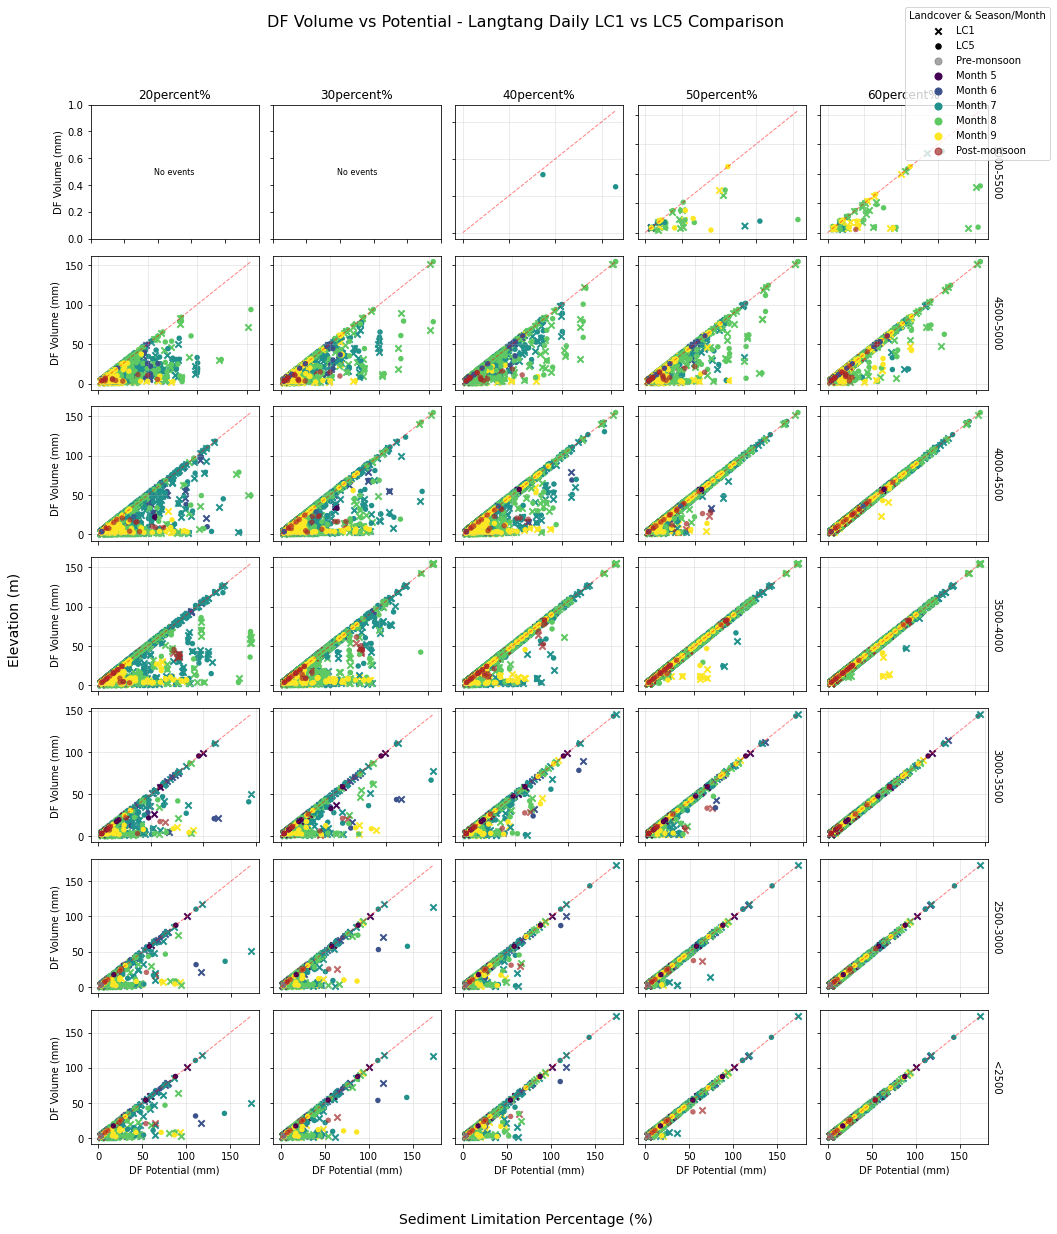

In [82]:
"""
Landcover Comparison by Elevation Plotting for Debris Flow Data
Created for SedCas model output visualization

This script creates multi-panel scatter plots comparing landcover 1 vs 5 
with elevation bins on y-axis and sediment limitation percentage on x-axis.
LC1 uses 'x' markers, LC5 uses 'o' markers.

Usage:
    python landcover_comparison_elevation_plot.py
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
import glob

# =============================================================================
# CONFIGURATION - CHANGE THESE VARIABLES AS NEEDED
# =============================================================================
LOCATION = 'langtang'  # Change to 'mustang' if processing mustang data
METHOD = 'daily'       # Focus on daily method
LANDCOVERS = [1, 5]    # Land covers to compare
DATA_FOLDER = "/Users/varyabazilova/Desktop/paper2/202406_modelruns/processing_pipeline/test_data_for_claude/volume_per_event_data"

def load_landcover_method_data(landcover, method):
    """
    Load all percentage data for a specific landcover and method
    
    Args:
        landcover: Land cover number (1 or 5)
        method: Method ('daily' or 'once')
    
    Returns:
        pd.DataFrame: Combined data for all percentages
    """
    
    data_folder = Path(DATA_FOLDER)
    
    # Find all CSV files for this landcover and method
    pattern = f"{LOCATION}_{method}_{landcover}landcover_*percent_volume_per_event_data.csv"
    files = list(data_folder.glob(pattern))
    
    if not files:
        print(f"No data files found for landcover {landcover}, method {method}")
        print(f"Looking for pattern: {pattern}")
        return pd.DataFrame()
    
    all_data = []
    
    for file in files:
        print(f"Loading: {file.name}")
        df = pd.read_csv(file)
        all_data.append(df)
    
    # Combine all data
    if all_data:
        combined_data = pd.concat(all_data, ignore_index=True)
        print(f"  Events loaded: {len(combined_data)}")
        return combined_data
    else:
        return pd.DataFrame()

def create_landcover_elevation_comparison_plot(lc1_data, lc5_data, save_path=None):
    """
    Create scatter plot grid: percentage (x-axis) vs elevation_bin (y-axis)
    LC1 as 'x' markers, LC5 as 'o' markers
    
    Args:
        lc1_data: DataFrame with LC1 debris flow events
        lc5_data: DataFrame with LC5 debris flow events
        save_path: Optional path to save the plot
    
    Returns:
        matplotlib figure
    """
    
    # Combine data to get overall ranges
    all_data = []
    if len(lc1_data) > 0:
        all_data.append(lc1_data)
    if len(lc5_data) > 0:
        all_data.append(lc5_data)
    
    if not all_data:
        print("No data to plot!")
        return None
    
    combined_data = pd.concat(all_data, ignore_index=True)
    
    # Get unique percentages and elevation bins
    percentages = sorted(combined_data['percentage'].unique())
    
    # Define elevation bin order (highest to lowest for plotting)
    elevation_bin_order = [
        '>=6000', '5500-6000', '5000-5500', '4500-5000',
        '4000-4500', '3500-4000', '3000-3500', '2500-3000', '<2500'
    ]
    
    # Filter to only existing elevation bins in correct order
    available_bins = combined_data['elevation_bin'].unique()
    elevation_bins = [bin_name for bin_name in elevation_bin_order if bin_name in available_bins]
    
    print(f"Percentages: {percentages}")
    print(f"Elevation bins: {elevation_bins}")
    
    # Create figure with subplots
    n_percentages = len(percentages)
    n_elevation_bins = len(elevation_bins)
    
    fig, axes = plt.subplots(n_elevation_bins, n_percentages, 
                            figsize=(n_percentages * 3, n_elevation_bins * 2.5),
                            sharey=False, sharex=False, facecolor='white')
    
    # Handle case of single row or column
    if n_elevation_bins == 1:
        axes = axes.reshape(1, -1)
    if n_percentages == 1:
        axes = axes.reshape(-1, 1)
    if n_elevation_bins == 1 and n_percentages == 1:
        axes = np.array([[axes]])
    
    # Define seasonal colors
    def get_month_colors(months):
        month_colors = {}
        for month in months:
            if month in [1, 2, 3, 4, 10, 11, 12]:  # Pre-monsoon and Post-monsoon
                if month in [1, 2, 3, 4]:
                    month_colors[month] = 'grey'  # Pre-monsoon
                else:
                    month_colors[month] = 'brown'  # Post-monsoon
            elif month in [5, 6, 7, 8, 9]:  # Monsoon
                viridis_colors = plt.cm.viridis([0.0, 0.25, 0.5, 0.75, 1.0])
                monsoon_mapping = {5: viridis_colors[0], 6: viridis_colors[1], 7: viridis_colors[2], 
                                 8: viridis_colors[3], 9: viridis_colors[4]}
                month_colors[month] = monsoon_mapping[month]
        return month_colors
    
    # Create subplot for each percentage/elevation combination
    for i, elevation_bin in enumerate(elevation_bins):
        for j, percentage in enumerate(percentages):
            
            ax = axes[i, j]
            
            # Filter data for this combination
            lc1_subset = lc1_data[(lc1_data['elevation_bin'] == elevation_bin) & 
                                 (lc1_data['percentage'] == percentage)] if len(lc1_data) > 0 else pd.DataFrame()
            lc5_subset = lc5_data[(lc5_data['elevation_bin'] == elevation_bin) & 
                                 (lc5_data['percentage'] == percentage)] if len(lc5_data) > 0 else pd.DataFrame()
            
            # Track if we have any data
            has_data = len(lc1_subset) > 0 or len(lc5_subset) > 0
            
            if has_data:
                max_vals = []
                
                # Plot LC1 data with 'x' markers
                if len(lc1_subset) > 0:
                    months = lc1_subset['month'].unique()
                    month_colors = get_month_colors(months)
                    
                    for month in lc1_subset['month'].unique():
                        month_data = lc1_subset[lc1_subset['month'] == month]
                        
                        # Set alpha based on season
                        if month in [5, 6, 7, 8, 9]:  # Monsoon - full opacity
                            alpha = 1.0
                        else:  # Pre-monsoon and post-monsoon - reduced opacity
                            alpha = 0.7
                        
                        scatter = ax.scatter(
                            x=month_data['dfspot'], 
                            y=month_data['dfs'],
                            c=month_colors[month],
                            s=40,
                            alpha=alpha,
                            marker='x',  # LC1 uses 'x' markers
                            linewidths=2,
                            label='LC1' if month == lc1_subset['month'].iloc[0] and j == 0 and i == 0 else ""
                        )
                    
                    max_vals.extend([lc1_subset['dfspot'].max(), lc1_subset['dfs'].max()])
                
                # Plot LC5 data with 'o' markers
                if len(lc5_subset) > 0:
                    months = lc5_subset['month'].unique()
                    month_colors = get_month_colors(months)
                    
                    for month in lc5_subset['month'].unique():
                        month_data = lc5_subset[lc5_subset['month'] == month]
                        
                        # Set alpha based on season
                        if month in [5, 6, 7, 8, 9]:  # Monsoon - full opacity
                            alpha = 1.0
                        else:  # Pre-monsoon and post-monsoon - reduced opacity
                            alpha = 0.7
                        
                        scatter = ax.scatter(
                            x=month_data['dfspot'], 
                            y=month_data['dfs'],
                            c=month_colors[month],
                            s=30,
                            alpha=alpha,
                            marker='o',  # LC5 uses 'o' markers
                            edgecolor='none',
                            label='LC5' if month == lc5_subset['month'].iloc[0] and j == 0 and i == 0 else ""
                        )
                    
                    max_vals.extend([lc5_subset['dfspot'].max(), lc5_subset['dfs'].max()])
                
                # Add 1:1 line
                if max_vals and any(pd.notna(max_vals)):
                    max_val = max([v for v in max_vals if pd.notna(v)])
                    if max_val > 0:
                        ax.plot([0, max_val], [0, max_val], 'r--', alpha=0.5, linewidth=1)
                
                # Set axis labels only on edges
                if i == n_elevation_bins - 1:  # Bottom row
                    ax.set_xlabel('DF Potential (mm)')
                if j == 0:  # Left column
                    ax.set_ylabel('DF Volume (mm)')
                
                # Add title for top row (percentage)
                if i == 0:
                    ax.set_title(f'{percentage}%')
                
                # Add elevation bin label on right side
                if j == n_percentages - 1:
                    ax.text(1.02, 0.5, elevation_bin, transform=ax.transAxes,
                           rotation=270, ha='left', va='center')
                
                # Add grid
                ax.grid(True, alpha=0.3)
                
                # Set white background for each subplot
                ax.set_facecolor('white')
                
                # Only show tick labels on leftmost and bottom panels
                if j != 0:  # Not leftmost column
                    ax.set_yticklabels([])
                if i != n_elevation_bins - 1:  # Not bottom row
                    ax.set_xticklabels([])
            
            else:
                # No data for this combination
                ax.text(0.5, 0.5, 'No events', transform=ax.transAxes,
                       ha='center', va='center', fontsize=8)
                ax.set_xlim(0, 1)
                ax.set_ylim(0, 1)
                
                # Set white background
                ax.set_facecolor('white')
                
                # Set axis labels and titles
                if i == n_elevation_bins - 1:
                    ax.set_xlabel('DF Potential (mm)')
                if j == 0:
                    ax.set_ylabel('DF Volume (mm)')
                if i == 0:
                    ax.set_title(f'{percentage}%')
                if j == n_percentages - 1:
                    ax.text(1.02, 0.5, elevation_bin, transform=ax.transAxes,
                           rotation=270, ha='left', va='center')
                
                # Hide tick labels
                if j != 0:
                    ax.set_yticklabels([])
                if i != n_elevation_bins - 1:
                    ax.set_xticklabels([])
    
    # Add overall title
    # fig.suptitle(f'DF Volume vs Potential - {LOCATION.title()} {METHOD.title()} LC1 vs LC5 Comparison', 
    #             fontsize=16, y=0.98)
    
    # Add overall axis labels
    fig.text(0.5, 0.02, 'Sediment Limitation Percentage (%)', ha='center', fontsize=14)
    fig.text(0.02, 0.5, 'Elevation (m)', va='center', rotation='vertical', fontsize=14)
    
    # Adjust layout
    plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])
    
    # Create comprehensive legend
    legend_elements = []
    
    # Add landcover markers
    legend_elements.append(plt.scatter([], [], c='black', s=40, marker='x', linewidths=2, label='LC1'))
    legend_elements.append(plt.scatter([], [], c='black', s=30, marker='o', label='LC5'))
    
    # Add separator
    legend_elements.append(plt.plot([], [], color='none', label='')[0])  # Empty line for spacing
    
    # Add seasonal colors
    legend_elements.append(plt.scatter([], [], c='grey', s=50, alpha=0.7, label='Pre-monsoon'))
    
    # Add individual monsoon months (5-9)
    viridis_colors = plt.cm.viridis([0.0, 0.25, 0.5, 0.75, 1.0])
    monsoon_mapping = {5: viridis_colors[0], 6: viridis_colors[1], 7: viridis_colors[2], 
                     8: viridis_colors[3], 9: viridis_colors[4]}
    for month in [5, 6, 7, 8, 9]:
        legend_elements.append(plt.scatter([], [], c=monsoon_mapping[month], s=50, label=f'Month {month}'))
    
    legend_elements.append(plt.scatter([], [], c='brown', s=50, alpha=0.7, label='Post-monsoon'))
    
    fig.legend(handles=legend_elements, title='Landcover & Season/Month', loc='upper right', 
              bbox_to_anchor=(0.99, 0.99))
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Plot saved to: {save_path}")
    
    return fig

def main():
    """
    Main execution function
    """
    
    print(f"=== Landcover Comparison by Elevation for {LOCATION.upper()} ({METHOD.upper()}) ===")
    print(f"LC1 (x markers) vs LC5 (o markers)")
    print(f"Data folder: {DATA_FOLDER}\n")
    
    # Load data for both landcovers
    lc1_data = load_landcover_method_data(1, METHOD)
    lc5_data = load_landcover_method_data(5, METHOD)
    
    # Check if we have any data
    total_events = len(lc1_data) + len(lc5_data)
    
    if total_events > 0:
        # Create plot
        output_file = f"{LOCATION}_{METHOD}_LC1_vs_LC5_elevation_comparison_scatter.png"
        output_path = Path("/Users/varyabazilova/Desktop/paper2/202406_modelruns/processing_pipeline/test_data_for_claude/dfs_vs_dfspot_plots") / output_file
        
        # Ensure output directory exists
        output_path.parent.mkdir(exist_ok=True)
        
        fig = create_landcover_elevation_comparison_plot(lc1_data, lc5_data, save_path=output_path)
        
        # Display summary statistics
        print(f"\n=== Data Summary ===")
        print(f"LC1 events: {len(lc1_data)}")
        print(f"LC5 events: {len(lc5_data)}")
        if len(lc1_data) > 0:
            print(f"LC1 percentages: {sorted(lc1_data['percentage'].unique())}")
            print(f"LC1 elevation bins: {sorted(lc1_data['elevation_bin'].unique())}")
        if len(lc5_data) > 0:
            print(f"LC5 percentages: {sorted(lc5_data['percentage'].unique())}")
            print(f"LC5 elevation bins: {sorted(lc5_data['elevation_bin'].unique())}")
        
        if fig:
            plt.show()
    
    else:
        print("No data found! Check the data folder and file naming patterns.")

if __name__ == "__main__":
    main()